In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv("Spotify -Raw Data.csv",encoding='ISO-8859-1')
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["in_spotify_playlists"] = pd.to_numeric(df["in_spotify_playlists"], errors="coerce")
df = df.dropna()

threshold = df["streams"].quantile(0.80)  # Top 10% most streamed songs
df["popular"] = (df["streams"] >= threshold).astype(int) 

features = ["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%","in_spotify_playlists"]
X = df[features]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Full dataset distribution:\n", df["popular"].value_counts())
print("Train set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())
print(df["popular"].value_counts())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred,zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Full dataset distribution:
 popular
0    652
1    164
Name: count, dtype: int64
Train set distribution:
 popular
0    521
1    131
Name: count, dtype: int64
Test set distribution:
 popular
0    131
1     33
Name: count, dtype: int64
popular
0    652
1    164
Name: count, dtype: int64
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       131
           1       0.92      0.67      0.77        33

    accuracy                           0.92       164
   macro avg       0.92      0.83      0.86       164
weighted avg       0.92      0.92      0.92       164


Confusion Matrix:
 [[129   2]
 [ 11  22]]


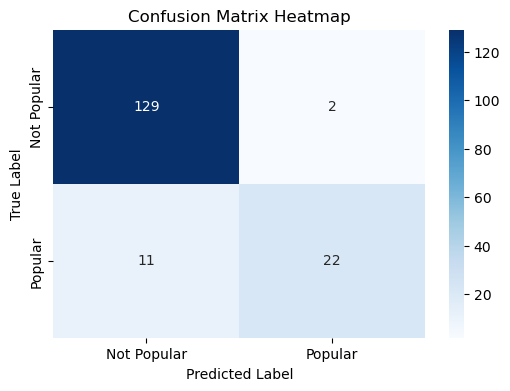

In [11]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
